In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Display Pandas Dataframes Settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

PHYSICAL_THREADS = 8

In [10]:
serial_data = pd.read_csv("datasets/data-Serial.csv").to_numpy()
spmd_data = pd.read_csv("datasets/data-SPMD.csv").to_numpy()
spmd_parfor_data = pd.read_csv("datasets/data-SPMD-ParFor.csv").to_numpy()
sstatic_data = pd.read_csv("datasets/data-SStatic.csv").to_numpy()
sdynamic_data = pd.read_csv("datasets/data-SDynamic.csv").to_numpy()
sguided_data = pd.read_csv("datasets/data-SGuided.csv").to_numpy()
sauto_data = pd.read_csv("datasets/data-SAuto.csv").to_numpy()
task_data = pd.read_csv("datasets/data-Task.csv").to_numpy()

threads_array = np.arange(start=1,stop=PHYSICAL_THREADS+1) # Returns numpy array from 1 (Inclusive) to 9 (Exclusive)

algorithm_data = pd.DataFrame(columns=
    ['ThreadQty', 
     'Code 1 (SPMD)',
     'Code 2 (SPMD ParFor)' ,
     'Code 3 (Static)',
     'Code 4 (Dynamic)',
     'Code 5 (Guided)',
     'Code 6 (Auto)',
     'Code 7 (Task)'
    ])

columns = pd.MultiIndex.from_product([['Speedup', 'Efficiency', 'Parallelizability']], names=[''])
codes = ['SPMD', 'SPMD ParFor' ,'Static', 'Dynamic', 'Guided', 'Auto', 'Task']
rows = pd.MultiIndex.from_tuples([(thread, code) for thread in threads_array for code in codes], names=['ThreadQty', ''])
algorithm_metrics = pd.DataFrame(index=rows, columns=columns)

#### Secuential Algorithm Data

In [11]:
secuential_data = pd.DataFrame(columns=['Code 0 (Serial)'])
secuential_data.loc['1'] = np.mean(serial_data)
print("\033[1mSecuential Algorithm Execution Time:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
secuential_data

Secuential Algorithm Execution Time:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 0 (Serial)
1,5.748721


#### Parallel Algorithms Data

In [12]:
for index in range(len(spmd_data)):
    algorithm_data.loc[f'{index+1}'] = [
        f'{threads_array[index]}', 
        np.mean(spmd_data[index]), 
        np.mean(spmd_parfor_data[index]),
        np.mean(sstatic_data[index]),
        np.mean(sdynamic_data[index]),
        np.mean(sguided_data[index]),
        np.mean(sauto_data[index]),
        np.mean(task_data[index])
    ]

algorithm_data.set_index('ThreadQty', inplace=True)
print("\033[1mParallel Algorithm Analysis:\033[0m\n \tNPOINTS: 1000\tMAXITER: 1000\n \tTimes Executed per Thread: 5")
algorithm_data

Parallel Algorithm Analysis:
 	NPOINTS: 1000	MAXITER: 1000
 	Times Executed per Thread: 5


,Code 1 (SPMD),Code 2 (SPMD ParFor),Code 3 (Static),Code 4 (Dynamic),Code 5 (Guided),Code 6 (Auto),Code 7 (Task)
ThreadQty,,,,,,,
1,3.461499,3.485991,3.428270,3.443290,3.468670,3.469777,3.417984
2,2.261583,2.380663,2.249307,2.376573,2.405540,2.263818,2.063509
3,1.848794,1.508184,1.848497,1.543551,1.548280,1.992023,1.548419
4,1.726327,1.504283,1.717372,1.509056,1.546534,1.763919,1.544075
5,1.541465,1.533212,1.536063,1.536484,1.578610,1.587631,1.753789
6,1.535647,1.528956,1.528599,1.534349,1.566411,1.537742,1.951197
7,1.536120,1.533878,1.537840,1.727659,1.562354,1.619757,2.177332
8,1.534419,1.564064,1.536016,1.549701,1.571273,1.554247,2.260083


#### Algorithm Metrics

In [13]:
for index in range(len(threads_array)):
    for j in range(len(codes)):
        speedup = secuential_data.iat[0, 0] / np.round(algorithm_data.iat[index, j], 6)
        efficiency = np.round((speedup / algorithm_data.iat[index, j]) * 100, 2)
        parallelizability = np.round(algorithm_data.iat[0, j] / algorithm_data.iat[index, j],3)

        algorithm_metrics.at[(threads_array[index], codes[j]), ('Speedup')] = speedup
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Efficiency')] = f'{efficiency}%'
        algorithm_metrics.at[(threads_array[index], codes[j]), ('Parallelizability')] = parallelizability
        
print("\033[1mAlgorithms Metrics\033[0m")
algorithm_metrics

Algorithms Metrics


Speedup Efficiency Parallelizability
ThreadQty                                                   
1         SPMD         1.660761     47.98%               1.0
          SPMD ParFor  1.649092     47.31%               1.0
          Static       1.676858     48.91%               1.0
          Dynamic      1.669543     48.49%               1.0
          Guided       1.657327     47.78%               1.0
          Auto         1.656798     47.75%               1.0
          Task         1.681904     49.21%               1.0
2         SPMD         2.541901    112.39%             1.531
          SPMD ParFor  2.414756    101.43%             1.464
          Static       2.555774    113.62%             1.524
          Dynamic      2.418912    101.78%             1.449
          Guided       2.389784     99.34%             1.442
          Auto         2.539392    112.17%             1.533
          Task         2.785896    135.01%             1.656
3         SPMD         3.109444    168.19%             1.872
          SPMD ParFor  3.811684    252.73%             2.311
          Static       3.109943    168.24%             1.855
          Dynamic      3.724348    241.28%             2.231
          Guided       3.712973    239.81%              2.24
          Auto         2.885871    144.87%             1.742
          Task         3.712639    239.77%             2.207
4         SPMD          3.33003     192.9%             2.005
          SPMD ParFor  3.821569    254.05%             2.317
          Static       3.347394    194.91%             1.996
          Dynamic      3.809482    252.44%             2.282
          Guided       3.717164    240.35%             2.243
          Auto         3.259062    184.76%             1.967
          Task         3.723084    241.12%             2.214
5         SPMD         3.729388    241.94%             2.246
          SPMD ParFor  3.749463    244.55%             2.274
          Static       3.742504    243.64%             2.232
          Dynamic      3.741478    243.51%             2.241
          Guided       3.641635    230.69%             2.197
          Auto         3.620943    228.07%             2.186
          Task         3.277886     186.9%             1.949
6         SPMD         3.743517    243.77%             2.254
          SPMD ParFor    3.7599    245.91%              2.28
          Static       3.760778    246.03%             2.243
          Dynamic      3.746684    244.19%             2.244
          Guided       3.669995    234.29%             2.214
          Auto         3.738417    243.11%             2.256
          Task         2.946254     151.0%             1.752
7         SPMD         3.742365    243.62%             2.253
          SPMD ParFor  3.747835    244.34%             2.273
          Static       3.738179    243.08%             2.229
          Dynamic      3.327463     192.6%             1.993
          Guided       3.679525    235.51%              2.22
          Auto         3.549126    219.11%             2.142
          Task         2.640259    121.26%              1.57
8         SPMD         3.746513    244.17%             2.256
          SPMD ParFor  3.675503     235.0%             2.229
          Static       3.742618    243.66%             2.232
          Dynamic      3.709568    239.37%             2.222
          Guided       3.658639    232.85%             2.208
          Auto         3.698718    237.97%             2.232
          Task         2.543589    112.54%             1.512

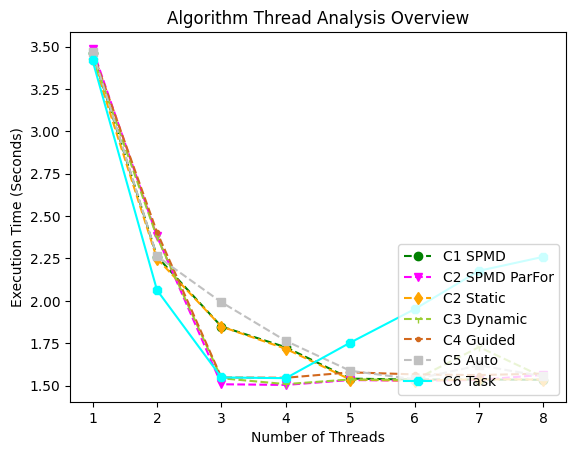

In [14]:
plt.title("Algorithm Thread Analysis Overview")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, algorithm_data.get('Code 2 (SPMD ParFor)'), 'v--', label="C2 SPMD ParFor", color='magenta')
plt.plot(threads_array, algorithm_data.get('Code 3 (Static)'), 'd--', label="C2 Static", color='orange')
plt.plot(threads_array, algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C3 Dynamic", color='yellowgreen')
plt.plot(threads_array, algorithm_data.get('Code 5 (Guided)'), '.--', label="C4 Guided", color='chocolate')
plt.plot(threads_array, algorithm_data.get('Code 6 (Auto)'), 's--', label="C5 Auto", color='silver')
plt.plot(threads_array, algorithm_data.get('Code 7 (Task)'), '8-', label="C6 Task", color='cyan')
plt.legend(loc="lower right")
plt.xticks(threads_array)
plt.show()

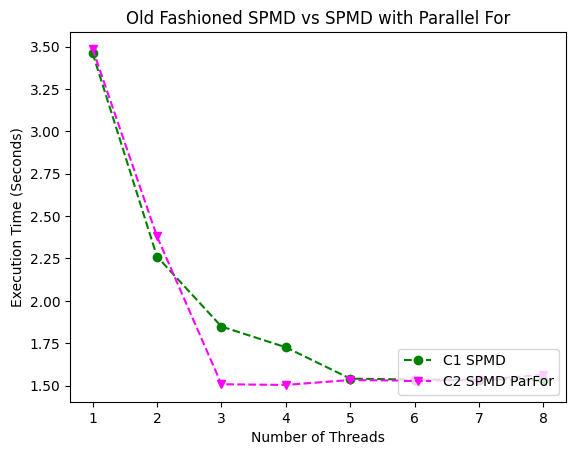

In [15]:
plt.title("Old Fashioned SPMD vs SPMD with Parallel For")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, algorithm_data.get('Code 1 (SPMD)'), 'o--', label="C1 SPMD", color='green')
plt.plot(threads_array, algorithm_data.get('Code 2 (SPMD ParFor)'), 'v--', label="C2 SPMD ParFor", color='magenta')
plt.legend(loc="lower right")
plt.xticks(threads_array)
plt.show()

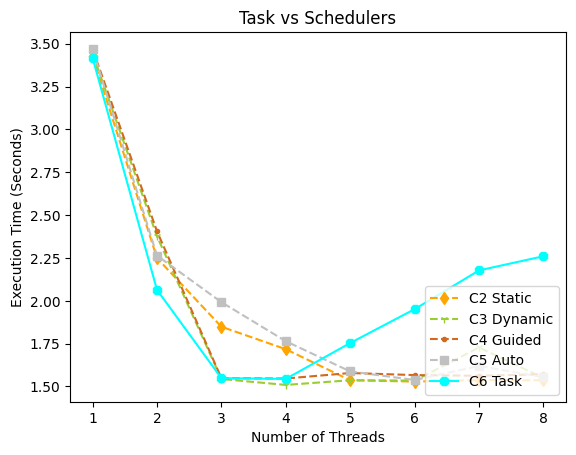

In [16]:
plt.title("Task vs Schedulers")
plt.xlabel("Number of Threads")
plt.ylabel("Execution Time (Seconds)")
plt.plot(threads_array, algorithm_data.get('Code 3 (Static)'), 'd--', label="C2 Static", color='orange')
plt.plot(threads_array, algorithm_data.get('Code 4 (Dynamic)'), '1--', label="C3 Dynamic", color='yellowgreen')
plt.plot(threads_array, algorithm_data.get('Code 5 (Guided)'), '.--', label="C4 Guided", color='chocolate')
plt.plot(threads_array, algorithm_data.get('Code 6 (Auto)'), 's--', label="C5 Auto", color='silver')
plt.plot(threads_array, algorithm_data.get('Code 7 (Task)'), '8-', label="C6 Task", color='cyan')
plt.legend(loc="lower right")
plt.xticks(threads_array)
plt.show()

#### Conclusiones
Con base en los resultados del análisis paralelo realizado, se concluye que el calendarizador que menor tiempo de ejecución tuvo desde 1 hasta 8 hilos fue el Calendarizador Estático con 1.536016	segundos (con 8 Hilos), sin embargo, la diferencia entre otros calendarizadores resulta ser muy mínima. Mientras que la versión SPMD del código, no alcanza a rebasar el umbral de los 1.5 segundos.

Ahora con la inclusión del código que emplea el constructo de Task, se obtuvieron mejores resultados en la ejecución de los hilos 3 y 4 con un tiempo de alrededor de 1.548 segundos, no obstante, a mayor cantidad de threads el desempeño del programa se reduce gradualmente.